In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
import tensorflow as tf
import keras
import cv2
import numpy as np
import os
import h5py
from matplotlib import pyplot as plt
import time
#os.chdir('')

Using TensorFlow backend.


In [0]:
with h5py.File("train_data.h5",'r') as F:
    x_train = np.array(F.get("x_train"))
    y_train = np.array(F.get("y_train"))

print(x_train.shape)
print(y_train.shape)

(4580, 224, 224, 3)
(4580, 5)


In [2]:
def bottleneck_res_block(block_input,factor):
  ###expansion convolution layer
  x = keras.layers.Conv2D(int(factor)*int(block_input.shape[3]),(1,1))(block_input) 
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.ReLU(max_value = 6)(x)
  
  ###depthwise convolution layer
  x = keras.layers.DepthwiseConv2D((3,3),padding = 'same')(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.ReLU(max_value = 6)(x)
  
  ###projection convolution layer
  x = keras.layers.Conv2D(int(int(x.shape[3])/int(factor)),(1,1))(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.ReLU(max_value = 6)(x)
  
  #Residual connect
  x = keras.layers.Add()([x,block_input])
  x = keras.layers.Dropout(rate = 0.3)(x)
  
  return x

In [3]:
def Tomato_model(input_shape):
  x_input = keras.layers.Input(input_shape)
  
  x = keras.layers.Conv2D(32,(1,1),padding = 'same')(x_input)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.MaxPool2D((2,2))(x)
  x = keras.layers.ReLU(max_value = 6)(x)
  x = keras.layers.Dropout(0.4)(x)
  x = bottleneck_res_block(x,3)
  x = keras.layers.GlobalAveragePooling2D()(x)
  x = keras.layers.Dense(5,activation = 'softmax')(x)
  
  model = keras.models.Model(inputs = x_input, outputs = x)
  
  return model

In [4]:
model = Tomato_model((224,224,3))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 224, 224, 32) 128         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 224, 224, 32) 128         conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxP

In [5]:
model.compile(optimizer ='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [6]:
filepath="trained_model/weights.{epoch:02d}-{val_acc:.2f}.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=1, mode='auto')
callbacks_list = [checkpoint]
model.fit(x = x_train, y = y_train, epochs = 40,validation_split = 0.12,callbacks = callbacks_list)

NameError: name 'x_train' is not defined

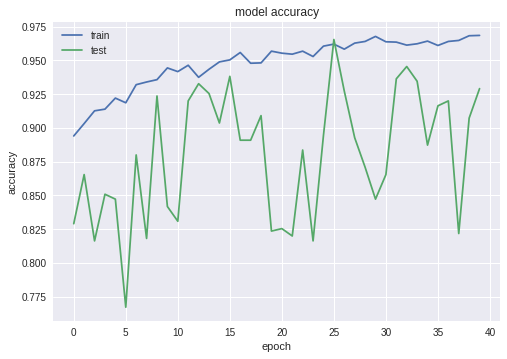

In [0]:
history = model.history
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

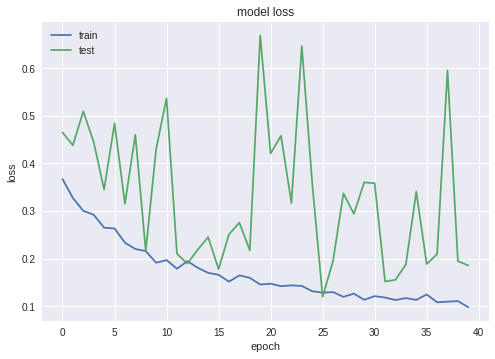

In [0]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [8]:
os.listdir()

['.ipynb_checkpoints',
 'Train_2.html',
 'Train_2.ipynb',
 'Train_2.ipynb - Colaboratory.html',
 'Train_2.ipynb - Colaboratory_files']